In [53]:
#Importing NLTK language resources for Text Processing
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rames\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rames\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\rames\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [54]:
#Data Exploration and Preprocessing

In [55]:
#Data Exploration and Preprocessing
import pandas as pd
df = pd.read_csv('blogs.csv')
df

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [57]:
df['Data'] = df['Data'].astype(str)   # convert to string

In [58]:
# Importing regular expression module and punctuation list for text cleaning
import re
import string

# Importing stopwords and tokenizer from NLTK
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Creating a set of English stopwords (e.g., "the", "is", "and")
stop_words = set(stopwords.words('english'))

# Function for cleaning raw text
def clean_text(text):
    text = text.lower() # Convert text to lowercase
    text = re.sub(r'\d+','', text) # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation)) # Remove punctuation
    tokens = word_tokenize(text) # Tokenize into individual words
    tokens = [word for word in tokens if word not in stop_words] # Remove stopwords
    return " ".join(tokens) # Join back cleaned tokens as a string

# Applying the cleaning function to the 'Data' column and create a new column 'Clean_Text'
df['Clean_Text'] = df['Data'].apply(clean_text)

# Inspecting original and cleaned text
print(df[['Data','Clean_Text']].head())


                                                Data  \
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....   
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...   
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...   

                                          Clean_Text  
0  path cantaloupesrvcscmuedumagnesiumclubcccmued...  
1  newsgroups altatheism path cantaloupesrvcscmue...  
2  path cantaloupesrvcscmuedudasnewsharvardedunoc...  
3  path cantaloupesrvcscmuedumagnesiumclubcccmued...  
4  xref cantaloupesrvcscmuedu altatheism talkreli...  


In [59]:
# Feature extraction
# Importing the TF-IDF vectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Clean_Text'])
y = df['Labels']

print("TF-IDF matrix shape:", X.shape)
# The TF-IDF matrix has 2000 rows and 46,002 columns. This means we have
# 2000 blog posts and 46,002 unique terms (features) extracted from the data.
# Each row represents a blog post and each column represents the importance
# of a particular word in that post

TF-IDF matrix shape: (2000, 46002)


In [60]:
##Naive Bayes Model for Text Classification

In [61]:
#importing the key components needed for model training and evaluation
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score


In [62]:
#Separating the data for training and testing and then trains the Naive Bayes classifier 
#on the training portion so that it can learn how to classify new blog posts
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [63]:
# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

In [64]:
# Checking accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))
# The model achieved an accuracy of 0.84, which means it correctly classified
# 84% of the blog posts in the test set. This indicates that the Naive Bayes
# classifier is performing well for this text classification task.

Accuracy: 0.84


In [65]:
!pip install textblob


In [66]:
#Sentiment Analysis
import textblob.download_corpora as tc
tc.download_all()

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\rames\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\rames\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rames\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\rames\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\rames\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\rames\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is alr

In [67]:
#importing the necessary libraries to perform sentiment analysis and to visualize the results.
from textblob import TextBlob
import matplotlib.pyplot as plt

In [68]:
# Function that returns Positive / Negative / Neutral
def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [69]:
# Apply on the original (non-cleaned) Data column
df['Sentiment'] = df['Data'].apply(get_sentiment)

In [70]:
# Display sentiment distribution
print(df['Sentiment'].value_counts())
# Out of 2000 blog posts, 1543 were classified as Positive and 457 as Negative.
# This shows that a large majority of the blog posts express a positive tone,
# while a smaller portion contains negative sentiment. No Neutral posts were
# detected for this dataset.

Sentiment
Positive    1543
Negative     457
Name: count, dtype: int64


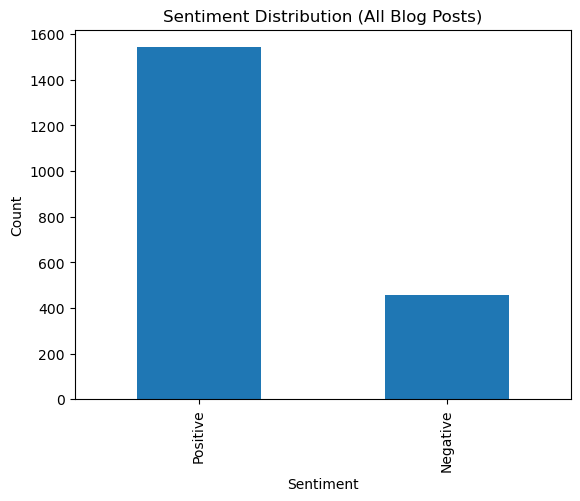

In [71]:
# Plot the distribution
df['Sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Distribution (All Blog Posts)')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()
#The bar plot clearly shows that positive posts are much more frequent than negative ones.
#This visual confirmation supports the numeric result and helps us quickly understand the overall tone of the dataset.

In [72]:
sent_per_label = df.groupby('Labels')['Sentiment'].value_counts().unstack().fillna(0)
print(sent_per_label)
# This table shows the number of Positive and Negative posts within each blog category.
# For every category, the number of positive posts is clearly higher than the number of
# negative posts.  This means that the positive tone is consistent across all categories,
# not just in one or two specific topics.  It also indicates that sentiment is fairly
# balanced across categories 

Sentiment                 Negative  Positive
Labels                                      
alt.atheism                     23        77
comp.graphics                   24        76
comp.os.ms-windows.misc         22        78
comp.sys.ibm.pc.hardware        20        80
comp.sys.mac.hardware           24        76
comp.windows.x                  27        73
misc.forsale                    16        84
rec.autos                       17        83
rec.motorcycles                 26        74
rec.sport.baseball              29        71
rec.sport.hockey                34        66
sci.crypt                       19        81
sci.electronics                 19        81
sci.med                         29        71
sci.space                       27        73
soc.religion.christian          13        87
talk.politics.guns              30        70
talk.politics.mideast           22        78
talk.politics.misc              22        78
talk.religion.misc              14        86


In [73]:
#Model Evaluation
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support

In [74]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.84


In [75]:
# full classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Classification Report:

                          precision    recall  f1-score   support

             alt.atheism       0.53      0.89      0.67        18
           comp.graphics       0.76      0.89      0.82        18
 comp.os.ms-windows.misc       0.95      0.91      0.93        22
comp.sys.ibm.pc.hardware       0.90      0.76      0.83        25
   comp.sys.mac.hardware       0.83      0.90      0.86        21
          comp.windows.x       1.00      0.84      0.91        25
            misc.forsale       1.00      0.72      0.84        18
               rec.autos       0.89      0.94      0.92        18
         rec.motorcycles       0.88      0.88      0.88        16
      rec.sport.baseball       0.83      0.83      0.83        18
        rec.sport.hockey       0.83      1.00      0.91        15
               sci.crypt       0.83      1.00      0.90        19
         sci.electronics       0.70      0.88      0.78        16
                 sci.med       0.88      0.88      

In [ ]:
# The Naive Bayes classification model successfully categorized the blog posts
# with an accuracy of 0.84, confirming that the approach is effective for topic
# classification of textual data.  The sentiment analysis further revealed that
# the majority of posts across all categories tend to express a positive tone,
# providing an additional layer of insight into the overall content of the dataset.
# Together, the classification and sentiment results offer a clear and informative
# understanding of both the topics and the emotional tone present in the blog posts.